<a href="https://colab.research.google.com/github/seidikun/nivelamento-icm/blob/main/Aula_1_Aquisi%C3%A7%C3%A3o_e_Digitaliza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1: Aquisição e Digitalização de Dados

Objetivo: entender o que é um sinal fisiológico, como ele é registrado e transformado em memória do computador, por meio de amostragem e quantização.

## Transdução de sinais fisiológicos

No mundo real, tudo ao nosso redor é uma experiência contínua. Os sinais biológicos que nosso corpo produz também são contínuos e, entre duas medições, existem infinitos valores intermediários.

Vamos dar um exemplo para ilustrar isso: pense em um movimento da perna durante a marcha humana. Se medirmos o ângulo do joelho, é evidente que ele varia dentro de um certo intervalo, por exemplo, de 180º quando está completamente extendido a quase 0º quando está completamente flexionado. No entanto, durante a marcha, qualquer valor intermediário é possível, pois nossas pernas se movem de forma fluida e contínua (pense em um ângulo de 34,45544796º, ele com certeza existe e é realizado durante a marcha!)

Agora, considere os diferentes sinais biológicos que podemos analisar: pode ser a variação elétrica gerada pelos músculos, a atividade hemodinâmica do cérebro ou até mesmo a temperatura da nossa pele. Quando queremos extrair informações fisiológicas, usamos sensores que convertem essas variações físicas ou químicas em sinais elétricos que podem ser processados por um computador. É por isso que muitas vezes chamamos esses sensores de **transdutores**.

Ao desenvolver um transdutor, o objetivo principal é transformar um fenômeno específico em um sinal elétrico compreensível. Vamos usar como exemplo um acelerômetro. Imagine uma peça móvel com uma inércia conhecida, por onde passa uma corrente elétrica constante. No entanto, essa corrente é alterada à medida que a peça se move. E aqui está a informação crucial: a posição da peça móvel muda quando há uma aceleração, e existe uma relação bem estabelecida entre o movimento da peça e a mudança na corrente elétrica. Com isso, temos um transdutor que converte aceleração em variação de corrente elétrica.

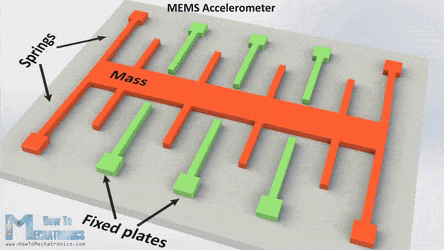

Os transdutores são peças-chave que nos permitem acessar e interpretar os sinais do corpo humano.






**[Exercício] Antes de prosseguir, pesquise: o que é o som? Como você descreveria o fenômeno físico que é o som?**

Agora grave um som no site https://voice-recorder-online.com/pt/ e baixe o arquivo.

**[Exercício] O som que você gravou passou por qual transdutor? Abaixo vamos ver como ele se transformou em um dado do computador**

## Digitalização de sinal

Transformar um fenômeno fisiológico em uma medida elétrica é interessante, porque a eletricidade percorre os sistemas eletrônicos, que são nossas ferramentas de análise. Mas a eletricidade dos sistemas eletrônicos ainda pode possuir infinitos valores (um acelerômtero transforma aceleração em eletricidade, mas a eletricidade ainda possui infinitos valores possíveis, certo?). Isso não seria problema se nossa ferramenta de análise for **analógica**, ou seja, capaz de interpretar valores contínuos, mas esse não é o caso, pois a grande maioria das ferramentas de análise atualmente, como é o caso do seu computador, é **digital**.

Sistema digitais interpretam valores discretos. E é aqui que queremos chegar: os sinais fisiológicos são contínuos, mas nossas ferramentas são digitais. Então como os sensores digitais funcionam? Vamos criar uma intuição

**[Exercício] Salve o arquivo que você gravou com o nome 'audio.wav' e faça upload dele neste colab**

Para isso, clique no botão de pasta da aba da esquerda e então no botão de upload.

Abaixo, não se preocupe com o código em si, apenas siga as instruções

In [ ]:
# Rode esta célul para importar as bibliotecas do python e carregar o arquivo
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
from matplotlib import pyplot as plt

samplerate, data = wavfile.read('som.wav')

In [ ]:
# Rode esta célula para dar play no audio
Audio(data[:,0],rate=samplerate)

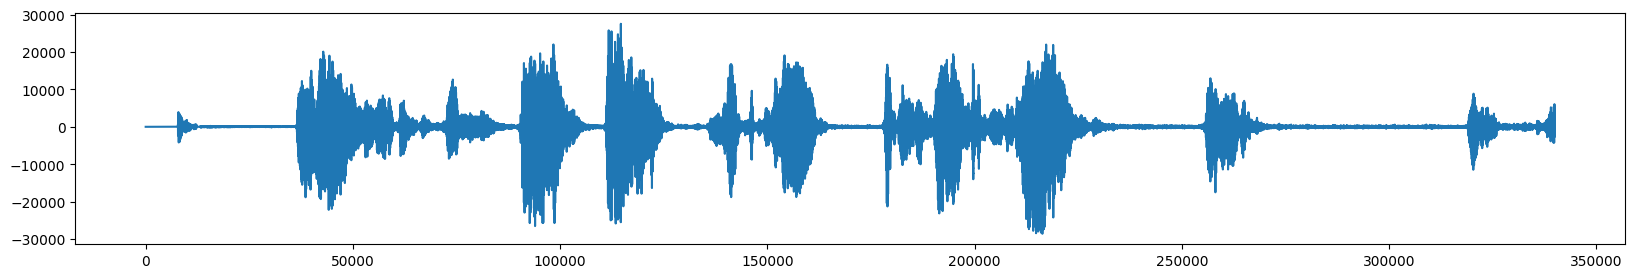

In [ ]:
# Rode esta célula para visualizar o sinal
plt.figure(figsize = (20, 3))
plt.plot(data.T[0,:])
plt.show()

## Amostragem

Um primeiro passo para a digitalização é a amostragem: o sistema digital possui uma frequência específica de aquisição, ou seja, ele observa uma amostra do sinal de tempos em tempos, e a duração desses intervalos é limitada pela tecnologia. Intervalos pequenos entre amostras geram uma alta frequência de amostragem.

Uma analogia seria se você tapasse os ouvidos e abrisse de forma periódica por um curto período de tempo, ouvindo o som apenas o momento em que os ouvidos não estão tampados.

**[Exercício] O que acontece se o período de tempo em que o ouvido fica tampado é longo? Você conseguiria discernir os sons que ouve?**

Vamos ver o efeito da amostragem com um sinal de áudio

**[Exercício] baixo altere o valor da variável divisor e rode o código, use valores de 1 a 10**

3200.0


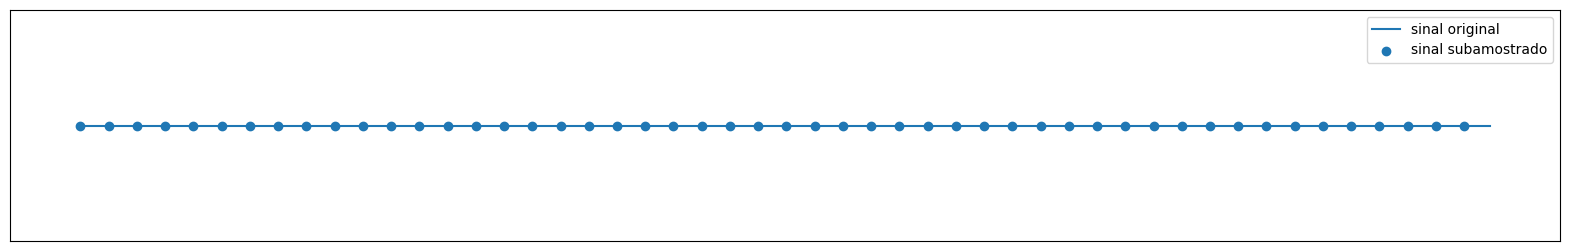

In [ ]:
divisor = 10

print(samplerate/divisor)

t = np.linspace(0, 500, 500)

plt.figure(figsize = (20, 3))
plt.plot(t, data[5000:5500,0], label = 'sinal original')
plt.scatter(t[::divisor], data[5000:5500:divisor,0], label = 'sinal subamostrado')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

Audio(data[::divisor,0],rate=samplerate/divisor)

## Quantização

Um sistema digital se baseia em representações binárias: 0s ou 1s. Na memória do computador, existem litralmente bilhões de transistores, que são componentes eletrônicos minúsculos cuja única função é gerar um valor desligado (0) ou ligado (1). Agora, é possível representar números, por exemplo 5, em uma sequência binária, no caso 1010. Consegue visualizar como isso é feito com transistores? Você só precisa que uma sequência ordenada de transistores esteja alocada para representar 1010 (ligado desligado ligado desligado, nessa sequência).

Não precisamos entender a lógica muito além disso, o importante é saber duas coisas:
*  Que números podem ser representados no sistema binário, por meio de transistores
*  Que é possível representar números quebrados, por exemplo 2,34 em binário
*  Que quanto mais transistores temos, podemos representar números maiores ou com mais casas decimais

Imagine então, que temos 5 transistores alocados para representar um número. Com 5 transistores, conseguimos representar, no sistema decimal, de 0 (00000) a 31 (11111).

## Exemplo: sinal de áudio




Vamos pensar em um exemplo concreto: como a voz se torna um sinal digital?

**[Exerício] Explique em termos de transdução e digitalização, como a voz de alguém se torna uma variável no python?**

**[Exercício] Vamos simular abaixo um exemplo de digitalização desse sinal de áudio. Altere o número de transistores (ntrasistors) e veja como o sinal digitalizado se comporta.**

Use números pequenos, por exemplo 2,3... e números maiores, por exemplo 10 para cima.

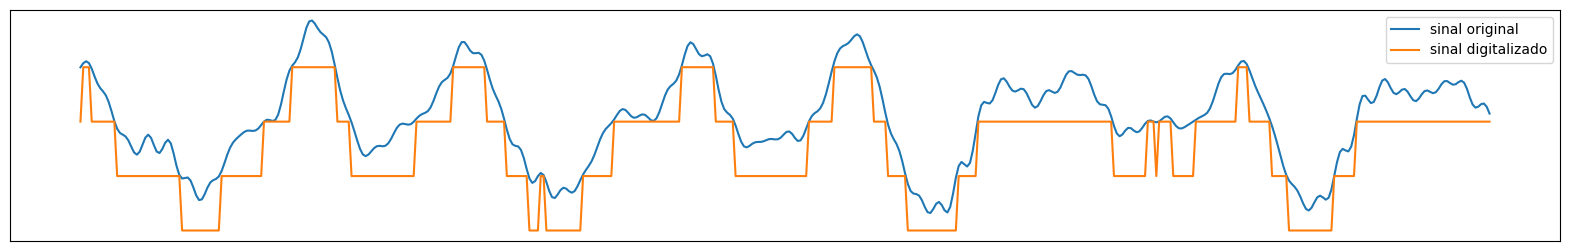

In [ ]:
# Altere o valor abaixo
ntransistors = 3
degraus = 2**ntransistors

# Ignore o código abaixo
data = np.interp(data, (data.min(), data.max()), (0, degraus))
plt.figure(figsize = (20, 3))
plt.plot(data[40000:40500,0].astype(np.float64), label = 'sinal original')
plt.plot(data[40000:40500,0].astype(np.int8), label = 'sinal digitalizado')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()
Audio(data[:,0].astype(np.int8),rate=samplerate)

## Juntando tudo

16000.0


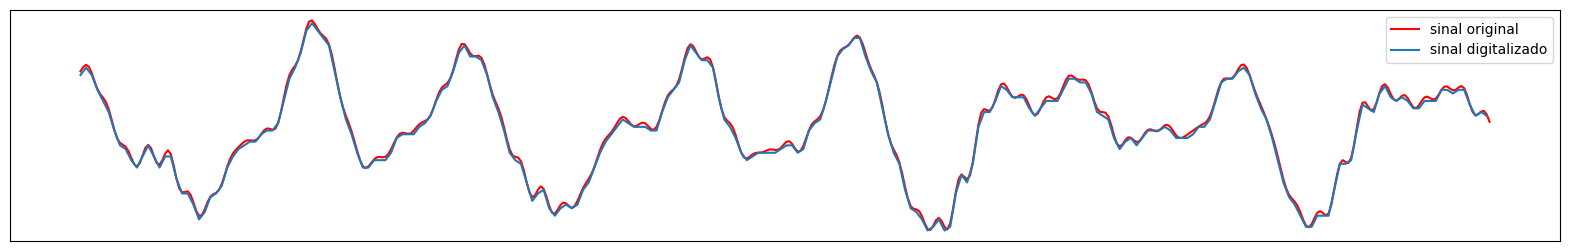

In [ ]:
# Altere o valor abaixo
ntransistors = 7
degraus = 2**ntransistors

# Ignore o código abaixo
data = np.interp(data, (data.min(), data.max()), (0, degraus))

divider = int(2)
print(samplerate/divider)

t = np.linspace(0, 500, 500)
plt.figure(figsize = (20, 3))
plt.plot(t, data[40000:40500,0].astype(np.float64), label = 'sinal original',color="r")
plt.plot(t[::divider], data[40000:40500:divider,0].astype(np.int8), label = 'sinal digitalizado')
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

Audio(data[::divider,0].astype(np.int8),rate=samplerate/divider)


In [ ]:
data[40000:40500:divider,0].astype(np.int8)

Os computadores atualmente pode utilizar até 64 transistores em sequência para representar números com casas decimais (float), de forma que em geral, a gente mal percebe a diferença entre dois degraus da digitalização.

Veja abaixo a diferença entre uma sequência de números usando a digitaliação padrão do python e a digitalização que simulamos acima

In [ ]:
print(data[5000:5010,0])
print(data[5000:5010,0].astype(np.int8))

**[Exercício] Escolha alguma tecnologia de aquisição de dados fisiológicos. Explique como o sinal fisiológico é registrado e como ele se torna uma variável python**